<a href="https://colab.research.google.com/github/afinasuandd/Tugas-Technical/blob/main/K_nn_Tugas_FGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data Set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_excel('data tugas klasifikasi alanturing.xlsx')
df.head()

,Credit Status,Gender,marital status,Age (years),Type of apartment,Occupation,number of dependants,Telephone,Foreign Worker,Account Balance,Duration of Credit (month),Credit Amount,Length of current employment (month),Instalment per cent
0,0.0,male,married,41.0,2.0,2.0,2.0,1.0,1.0,2.0,12.0,881.0,120.0,14.769157
1,0.0,male,single,33.0,2.0,3.0,7.0,1.0,1.0,1.0,18.0,1138.0,0.0,12.522755
2,0.0,male,married,26.0,2.0,3.0,7.0,1.0,1.0,1.0,21.0,3414.0,7.0,24.279633
3,1.0,male,married,48.0,2.0,2.0,5.0,1.0,1.0,2.0,24.0,1729.0,98.0,14.033694
4,1.0,male,married,25.0,2.0,3.0,5.0,2.0,1.0,4.0,24.0,1265.0,72.0,19.085431


# Visualisasi dan Analisis Data

In [ ]:
df['Age (years)'].value_counts()

26.0    32
23.0    31
24.0    30
28.0    29
29.0    28
25.0    28
35.0    28
34.0    26
27.0    24
30.0    23
33.0    23
31.0    23
36.0    22
32.0    20
37.0    19
22.0    18
40.0    16
41.0    14
47.0    13
43.0    12
45.0    12
38.0    12
39.0    12
44.0    11
42.0    11
21.0    10
46.0    10
48.0     9
20.0     9
54.0     7
49.0     7
51.0     6
52.0     6
61.0     5
55.0     5
63.0     5
60.0     5
50.0     5
66.0     4
53.0     4
57.0     4
65.0     3
56.0     2
74.0     2
58.0     2
68.0     2
64.0     1
75.0     1
62.0     1
59.0     1
70.0     1
Name: Age (years), dtype: int64

# Histogram Data

array([[<AxesSubplot:title={'center':'Credit Amount'}>]], dtype=object)

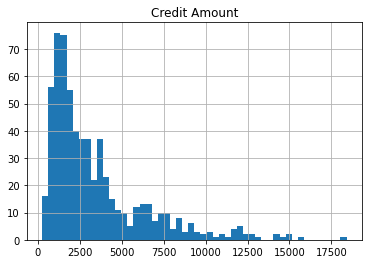

In [ ]:
df.hist(column='Credit Amount', bins=50)

# Feature Set

In [ ]:
df.columns

Index(['Credit Status', 'Gender', 'marital status', 'Age (years)',
       'Type of apartment', 'Occupation', 'number of dependants', 'Telephone',
       'Foreign Worker', 'Account Balance', 'Duration of Credit (month)',
       'Credit Amount', 'Length of current employment (month)',
       'Instalment per cent'],
      dtype='object')

In [ ]:
X = df[['Age (years)', 'Credit Amount']] .values  #.astype(float)
X[0:5]

array([[  41.,  881.],
       [  33., 1138.],
       [  26., 3414.],
       [  48., 1729.],
       [  25., 1265.]])

In [ ]:
y = df['Credit Status']
X[0:5] 

array([[  41.,  881.],
       [  33., 1138.],
       [  26., 3414.],
       [  48., 1729.],
       [  25., 1265.]])

# Normalisasi Data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51921349, -0.86895052],
       [-0.20386471, -0.78124036],
       [-0.83655814, -0.00447653],
       [ 1.15190692, -0.57954115],
       [-0.92694292, -0.73789722]])

# Pembagian Data Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (507, 2) (507,)
Test set: (127, 2) (127,)


# Klasifikasi

**K nearest neighbor (K-NN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Training

In [ ]:
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

# Predicting

In [ ]:
yhat = knn.predict(X_test)
yhat

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])

# Perhitungan Akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8027613412228797
Test set Accuracy:  0.5669291338582677


# MENCARI NILAI TERBAIK

In [ ]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63779528, 0.45669291, 0.56692913, 0.49606299, 0.5984252 ,
       0.55905512, 0.65354331, 0.64566929, 0.64566929])

In [ ]:
yhat.shape[0]

127

# Grafik/Plot nya

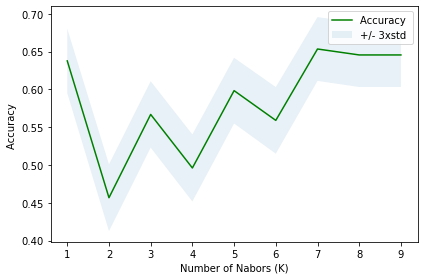

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6535433070866141 with k= 7
